**Nama : Made Agus Andi Gunawan**

**NIM : 118320008**

**Prodi : Teknik Fisika**

# **Case-Studies-Classification**

Klasifikasi pada data tabular - Breast Cancer Classification

In [3]:
import pandas as pd

DATA_URL = 'https://raw.githubusercontent.com/deepak525/Breast-Cancer-Visualization-and-Classification/master/data.csv'

data = pd.read_csv(DATA_URL)

data.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [5]:
data = data.drop('id', axis=1)

y = data['diagnosis']

X = data.drop('diagnosis', axis=1)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [7]:
X_train.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
169,14.97,16.95,96.22,685.9,0.09855,0.07885,0.02602,0.03781,0.1780,0.05650,0.2713,1.2170,1.893,24.28,0.005080,0.013700,0.007276,0.009073,0.01350,0.001706,16.11,23.00,104.60,793.7,0.1216,0.16370,0.06648,0.08485,0.2404,0.06428
302,20.09,23.86,134.70,1247.0,0.10800,0.18380,0.22830,0.12800,0.2249,0.07469,1.0720,1.7430,7.804,130.80,0.007964,0.047320,0.076490,0.019360,0.02736,0.005928,23.68,29.43,158.80,1696.0,0.1347,0.33910,0.49320,0.19230,0.3294,0.09469
120,11.41,10.82,73.34,403.3,0.09373,0.06685,0.03512,0.02623,0.1667,0.06113,0.1408,0.4607,1.103,10.50,0.006040,0.015290,0.015140,0.006460,0.01344,0.002206,12.82,15.97,83.74,510.5,0.1548,0.23900,0.21020,0.08958,0.3016,0.08523
311,14.61,15.69,92.68,664.9,0.07618,0.03515,0.01447,0.01877,0.1632,0.05255,0.3160,0.9115,1.954,28.90,0.005031,0.006021,0.005325,0.006324,0.01494,0.000895,16.46,21.75,103.70,840.8,0.1011,0.07087,0.04746,0.05813,0.2530,0.05695
519,12.75,16.70,82.51,493.8,0.11250,0.11170,0.03880,0.02995,0.2120,0.06623,0.3834,1.0030,2.495,28.62,0.007509,0.015610,0.019770,0.009199,0.01805,0.003629,14.45,21.74,93.63,624.1,0.1475,0.19790,0.14230,0.08045,0.3071,0.08557


In [8]:
y_train.head()

169    B
302    M
120    B
311    B
519    B
Name: diagnosis, dtype: object

**Menggunakan Naive Bayes**

In [9]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB, CategoricalNB, ComplementNB

model1 = GaussianNB()

model1.fit(X_train, y_train)

GaussianNB()

In [10]:
model1.score(X_test, y_test)

0.9473684210526315

**Menggunakan KNN**

In [11]:
from sklearn.neighbors import KNeighborsClassifier

model2 = KNeighborsClassifier(n_neighbors =5)

model2.fit(X_train, y_train)

KNeighborsClassifier()

In [12]:
model2.score(X_test, y_test)

0.9035087719298246

**Menggunakan SVM**

In [13]:
from sklearn.svm import SVC

model3 = SVC(kernel='rbf')

model3.fit(X_train, y_train)

SVC()

In [14]:
model3.score(X_test, y_test)

0.8947368421052632

dari hasil pengujian dan scoring semua model tersebut didapatkan bahwa 
1. Naive Bayes = 0.9210526315789473
2. KNN = 0.9122807017543859
3. SVM = 0.8947368421052632

disimpulkan model yang paling baik adalah Naive Bayes dengan nilai akurasi sebesar 0.9210526315789473

# **Klasifikasi pada data teks - Sentiment Analysis pada data dari account twitter airlines**

In [15]:
TWEET_URL = 'https://raw.githubusercontent.com/yxccxxx/Twitter-Airline-Sentiment-Analysis/master/Tweets.csv'

datatweet = pd.read_csv(TWEET_URL)
datatweet.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [16]:
ay = datatweet['airline']

aX = datatweet['text']

In [17]:
aX_train, aX_test, ay_train, ay_test = train_test_split(aX, ay, test_size=0.2)

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', strip_accents='ascii')
vectorizer.fit(aX_train)

aX_train_vector = vectorizer.transform(aX_train)
aX_test_vector =  vectorizer.transform(aX_test)

In [29]:
aX_train_vector.shape

(11712, 13009)

Menggunakan Naive Bayes

In [34]:
model1 = GaussianNB()
model1.fit(aX_train_vector.toarray(), ay_train)

GaussianNB()

In [40]:
model1.score(aX_test_vector.toarray(), ay_test)

0.33060109289617484

Menggunakan Algoritma KNN

In [42]:
model2 = KNeighborsClassifier(n_neighbors=9)
model2.fit(aX_train_vector.toarray(), ay_train)

KNeighborsClassifier(n_neighbors=9)

In [43]:
model2.score(aX_test_vector.toarray(), ay_test)

0.6663251366120219

# **Klasifikasi pad data Citra (Gambar)**

In [44]:
pip install scipy

In [51]:
#library Matematis
import numpy as np
from scipy import stats

#library visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [52]:
from sklearn.datasets import fetch_lfw_people
face = fetch_lfw_people(min_faces_per_person =60)

In [53]:
print(face.target_names)
print(face.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


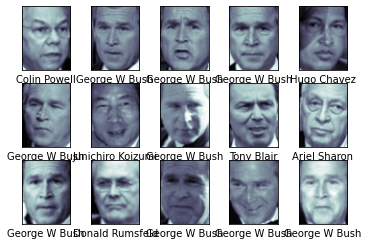

In [77]:
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
  axi.imshow(face.images[i], cmap='bone')
  axi.set(xticks=[], yticks=[], xlabel=face.target_names[face.target[i]])

In [80]:
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model_pca_svm = make_pipeline(pca, svc)

In [83]:
X_train, X_test, y_train, y_test = train_test_split(face.data, face.target, test_size=0.2)

In [84]:
model_pca_svm.fit(X_train, y_train)

Pipeline(steps=[('pca', PCA(n_components=150, random_state=42, whiten=True)),
                ('svc', SVC(class_weight='balanced'))])

In [85]:
model_pca_svm.score(X_test, y_test)

0.8222222222222222

Text(0.5, 0.98, 'Predicted Name; Incorrect Labels in Red')

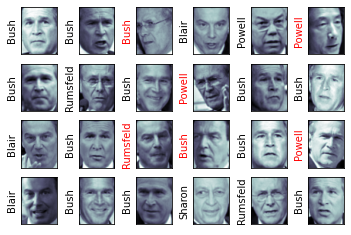

In [88]:
y_pred = model_pca_svm.predict(X_test)

fit, ax = plt.subplots(4,6)
for i, axi in enumerate(ax.flat):
  axi.imshow(X_test[i].reshape(62, 47), cmap='bone')
  axi.set(xticks=[], yticks=[])
  axi.set_ylabel(face.target_names[y_pred[i]].split()[-1], color='black' if y_pred[i] == y_test[i] else 'red')
fig.suptitle('Predicted Name; Incorrect Labels in Red', size=14)